In [219]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import sklearn

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.discriminant_analysis
import sklearn.neighbors

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

%matplotlib inline

In [220]:
college = pd.read_csv('College.csv')
# We drop the 'Private' variable because it is binary and causes bugs in the remainder of the code
college = college.drop(['Private'], axis = 1)
college.set_index('Names', inplace = True)
# We change the names of the predictors that contain '.'s
college.rename(columns = {'F.Undergrad' : 'FUndergrad', 'P.Undergrad' : 'PUndergrad', 'Room.Board' : 'RoomBoard',
                         'S.F.Ratio' : 'SFRatio', 'perc.alumni' : 'percalumni', 'Grad.Rate' : 'GradRate'}, inplace = True)
college.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
Names,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [221]:
college_train, college_test = sklearn.model_selection.train_test_split(college, test_size = 0.75, random_state = 42)
college_train.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3087.541237,2119.881443,823.118557,26.139175,55.257732,3956.731959,1047.783505,10299.092784,4332.845361,558.814433,1384.005155,72.984536,80.314433,14.046907,22.340206,9708.298969,64.170103
std,3713.412044,2565.210058,968.997308,17.711453,19.390868,4953.615514,1688.657883,3934.503942,1096.910318,153.109993,675.605999,17.265821,14.994959,3.887953,12.406656,4893.136393,17.623199
min,100.000000,90.000000,35.000000,1.000000,13.000000,249.000000,2.000000,4104.000000,1880.000000,96.000000,300.000000,10.000000,30.000000,2.500000,0.000000,3365.000000,15.000000
25%,778.250000,589.750000,240.500000,14.000000,40.250000,937.000000,81.000000,6900.000000,3545.000000,500.000000,900.000000,64.000000,72.000000,11.525000,13.000000,7001.000000,52.000000
50%,1557.500000,1095.000000,435.500000,22.000000,54.000000,1739.000000,435.500000,9785.000000,4192.000000,550.000000,1242.500000,77.000000,84.500000,13.400000,20.000000,8683.000000,64.500000
75%,4190.500000,2825.250000,1028.750000,34.000000,66.000000,5247.500000,1335.250000,12820.000000,4855.000000,600.000000,1700.000000,86.000000,92.000000,16.600000,30.000000,10640.750000,75.000000
max,21804.000000,18744.000000,6180.000000,95.000000,100.000000,26640.000000,10221.000000,21700.000000,7425.000000,1400.000000,4200.000000,100.000000,100.000000,25.300000,60.000000,42926.000000,118.000000


In [222]:
college_test.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
count,583.000000,583.000000,583.00000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,2973.053173,1985.169811,765.61578,28.030875,55.975986,3614.445969,791.246998,10487.780446,4365.739280,546.241852,1326.212693,72.552316,79.499142,14.103945,22.878216,9644.156089,65.893654
std,3923.674035,2413.285380,915.94701,17.606497,19.953798,4816.865831,1458.875062,4054.273753,1097.444021,168.916829,677.521536,16.017932,14.637883,3.984696,12.394597,5330.572457,17.020475
min,81.000000,72.000000,46.00000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,110.000000,250.000000,8.000000,24.000000,3.300000,0.000000,3186.000000,10.000000
25%,778.000000,611.500000,243.50000,16.000000,41.000000,1009.000000,100.500000,7405.000000,3599.000000,450.000000,850.000000,62.000000,70.000000,11.500000,13.000000,6718.000000,54.000000
50%,1561.000000,1110.000000,434.00000,24.000000,54.000000,1707.000000,349.000000,10000.000000,4200.000000,500.000000,1200.000000,75.000000,81.000000,13.700000,21.000000,8294.000000,66.000000
75%,3497.500000,2306.000000,853.00000,36.000000,69.000000,3733.000000,874.000000,12937.500000,5082.000000,600.000000,1677.500000,85.000000,92.000000,16.400000,31.000000,10872.000000,79.000000
max,48094.000000,26330.000000,6392.00000,96.000000,100.000000,31643.000000,21836.000000,20100.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [223]:
fit0 = smf.ols('Apps~Accept+Enroll+Top10perc+Top25perc+FUndergrad+PUndergrad+Outstate+RoomBoard+Books+Personal+PhD+Terminal+SFRatio+percalumni+Expend+GradRate', data = college_train).fit()
print(fit0.summary())


                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 06 Nov 2017   Prob (F-statistic):           8.94e-93
Time:                        23:50:36   Log-Likelihood:                -1612.3
No. Observations:                 194   AIC:                             3259.
Df Residuals:                     177   BIC:                             3314.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2038.5149    765.704     -2.662      0.0

In [243]:
predictors_train = college_train.drop(['Apps'], axis = 1)
predictors_test = college_test.drop(['Apps'], axis = 1)
pred = fit0.predict(predictors_test)
college_test['Predictions'] = pred
college_test['Error Squared'] = (college_test['Predictions'] - college_test['Apps'])**2
MSE = np.mean(college_test['Error Squared'])
MSE
# The test error is 1256863.5827134023
college_test = college_test.drop(['Predictions', 'Error Squared'], axis = 1)
predictors_test.head()
MSE

1256863.5827134023

In [226]:
lambdas = 10**np.linspace(10, -2, 100) * 0.5
lambdas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

In [227]:
predictors = college_train.drop(['Apps'], axis = 1)
ridge = Ridge(normalize = True)
coeffs = []
for l in lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(predictors_train, college_train['Apps'])
    coeffs.append(ridge.coef_)
    
np.shape(coeffs)

(100, 16)

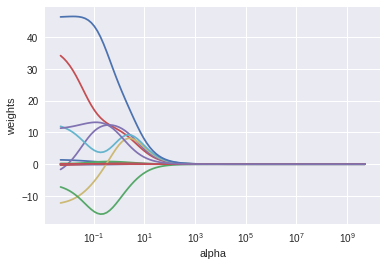

In [228]:
ax = plt.gca()
ax.plot(lambdas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [238]:
ridgecv = RidgeCV(alphas=lambdas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(predictors_train, college_train['Apps'])
ridgecv.alpha_

0.011550648500415791

In [246]:
model = Ridge(alpha=ridgecv.alpha_, normalize=True)
model.fit(predictors_train, college_train['Apps'])
predopt = ridgecv.predict(predictors_test)
print (pd.Series(ridgecv.coef_, index = predictors_train.columns))
print (mean_squared_error(college_test['Apps'], predopt))
# The lowest test MSE is with lambda = 0.011550648500415791 and min(test MSE) = 1333394.86795 > test MSE with least squares.

Accept         1.265705
Enroll        -0.046776
Top10perc     31.046398
Top25perc      0.677242
FUndergrad     0.017968
PUndergrad    -0.018909
Outstate      -0.106426
RoomBoard      0.222736
Books         -0.228625
Personal       0.037835
PhD          -11.440089
Terminal      10.654676
SFRatio       46.536906
percalumni    -8.457989
Expend         0.081767
GradRate      11.733132
dtype: float64
1333394.86795


In [245]:
# In order to double-check the ridge regression, we assign lambda a value of 0 and expect the same results as linear 
# regression using least squares.
ridgetest = Ridge(alpha = 0, normalize = True)
ridgetest.fit(predictors_train, college_train['Apps'])
predtest = ridgetest.predict(predictors_test)
print (pd.Series(ridgetest.coef_, index = predictors_train.columns))
print (mean_squared_error(college_test['Apps'], predtest))
# We get a test MSE value = 1256863.58271 which is equal to the linear regression value.

Accept         1.419755
Enroll        -0.408472
Top10perc     37.290461
Top25perc     -3.986843
FUndergrad     0.012173
PUndergrad    -0.015404
Outstate      -0.116415
RoomBoard      0.195096
Books         -0.323676
Personal       0.081404
PhD          -12.912304
Terminal      13.042434
SFRatio       46.190507
percalumni    -6.021748
Expend         0.078883
GradRate      10.951210
dtype: float64
1256863.58271


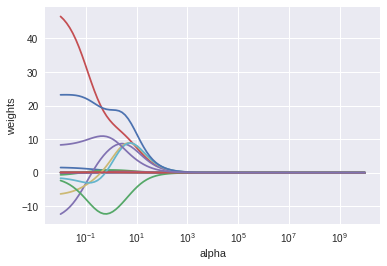

In [168]:
lasso = Lasso(max_iter=10000, normalize=True)
lcoeffs = []

for a in lambdas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(predictors_train), college_train['Apps'])
    lcoeffs.append(lasso.coef_)
    
lax = plt.gca()
lax.plot(lambdas * 2, coeffs)
lax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

plt.show()

In [247]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(predictors_train, college_train['Apps'])

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(predictors_train, college_train['Apps'])
predlasso = lasso.predict(predictors_test);
print (pd.Series(lasso.coef_, index = predictors_train.columns))
print (mean_squared_error(college_test['Apps'], lasso.predict(predictors_test)))
print(lassocv.alpha_)
# The lowest test MSE is with lambda = 2.51500095804 and min(test MSE) = 1329332.3878 > test MSE with least squares.

Accept         1.294664
Enroll        -0.000000
Top10perc     27.144780
Top25perc      0.000000
FUndergrad     0.000000
PUndergrad    -0.000000
Outstate      -0.064126
RoomBoard      0.148288
Books         -0.000000
Personal       0.000000
PhD           -0.000000
Terminal       0.000000
SFRatio       26.577005
percalumni    -4.244520
Expend         0.056031
GradRate       7.340456
dtype: float64
1329332.3878
2.51500095804


In [248]:
# To compare the results, we must compare the R^2 values
ols_r2 = 1 - np.mean((pred - college_test['Apps'])**2) / np.mean((np.mean(college_test['Apps']) - college_test['Apps'])**2)
print(ols_r2)

ridge_r2 = 1 - np.mean((predopt - college_test['Apps'])**2) / np.mean((np.mean(college_test['Apps']) - college_test['Apps'])**2)
print(ridge_r2)

lasso_r2 = 1 - np.mean((predlasso - college_test['Apps'])**2) / np.mean((np.mean(college_test['Apps']) - college_test['Apps'])**2)
print(lasso_r2)

0.918219855812
0.913240206765
0.913504539519


In [ ]:
# The least squares model has the highest R^2 value. There is not much difference between the different models.